In [1]:
from utils import SelectFilesButton
import transformer as tr
%matplotlib notebook
import ipywidgets as widgets
import traceback

VBox(children=(HBox(children=(SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange')), FloatText(value=0.5, description='Alpha value'), IntText(value=80, description='Emitters number'))), HBox(children=(Checkbox(value=True, description='Use sinogram filter'), Checkbox(value=False, description='Use interactive mode'), Button(button_style='info', description='Load', icon='check', style=ButtonStyle(), tooltip='Run')))))

Traceback (most recent call last):
  File "<ipython-input-2-7468a2f6bea3>", line 36, in run_task
    tr.params.set_values(alpha_btn.value, emitters_btn.value, use_filter_cbx.value, file_select.files[0])
IndexError: list index out of range


<IPython.core.display.Javascript object>


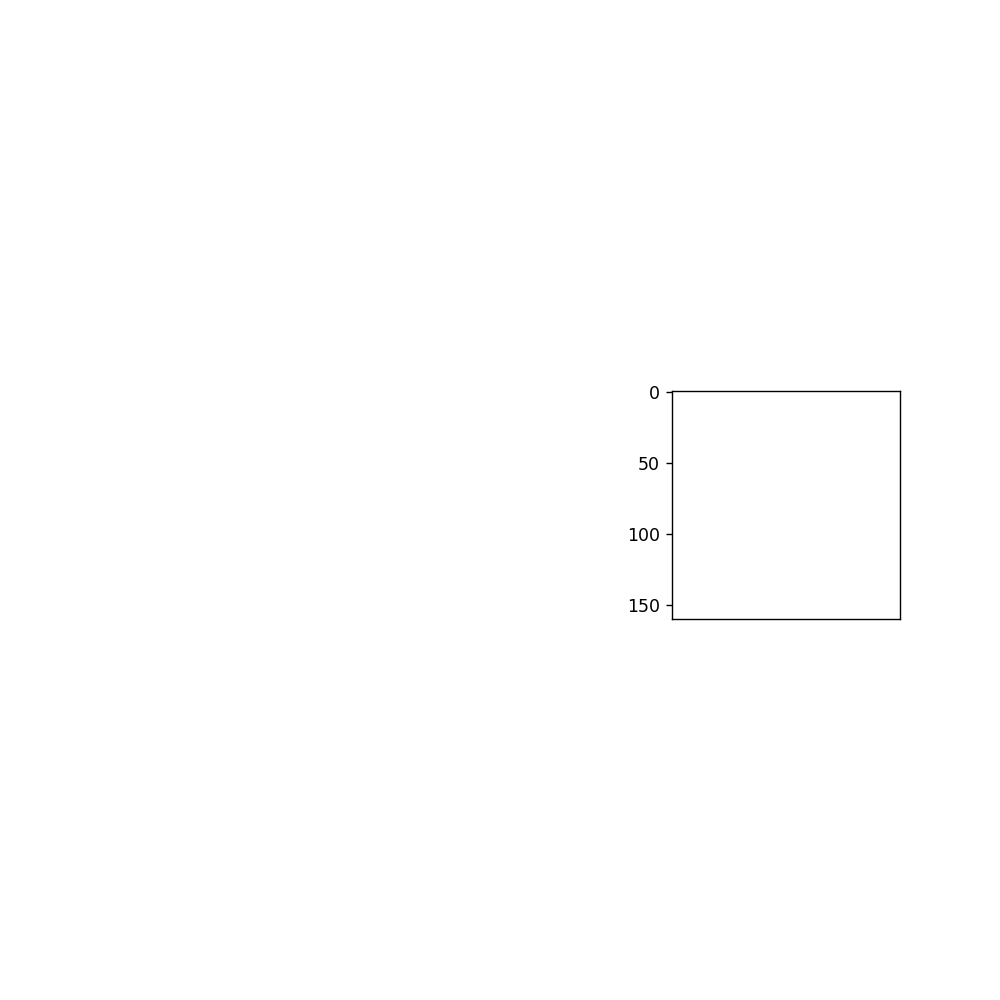

In [2]:
file_select = SelectFilesButton()
emitters_btn = widgets.IntText(
    value=tr.params.emitters_num,
    description='Emitters number',
    disabled=False
)

alpha_btn = widgets.FloatText(
    value=tr.params.alpha,
    description='Alpha value',
    disabled=False
)

use_filter_cbx = widgets.Checkbox(
    value=tr.params.use_filter,
    description='Use sinogram filter',
    disabled=False
)
interactive_btn = widgets.Checkbox(
    value=False,
    description='Use interactive mode',
    disabled=False
)
run_btn = widgets.Button(
    description='Load',
    disabled=False,
    button_style='info',
    tooltip='Run',
    icon='check',
)


def run_task(e):
    try:
        run_btn.disabled = True
        tr.params.set_values(alpha_btn.value, emitters_btn.value, use_filter_cbx.value, file_select.files[0])
        scanner = tr.Scanner(tr.params)
        scanner.watch_changes()
    except Exception as e:
        traceback.print_exc()
    run_btn.disabled = False


run_btn.on_click(run_task)
widgets.VBox([
    widgets.HBox([file_select, alpha_btn, emitters_btn]),
    widgets.HBox([use_filter_cbx, interactive_btn, run_btn]),
])